In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

df = load_data("SuperMarket Analysis.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [46]:
#Cleaning
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df

df = clean_columns(df)


In [47]:
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,sales,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax_5%                   1000 non-null   float64
 9   sales                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

In [54]:
# Converting date
def convert_types(df):
    df["date"] = pd.to_datetime(df["date"], format="%m/%d/%Y", errors="coerce")
    df["time"] = pd.to_datetime(df["time"], format="%I:%M:%S %p").dt.time
    return df

df = convert_types(df)


In [55]:
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,sales,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [56]:
df.isnull().sum()

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5%                     0
sales                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64

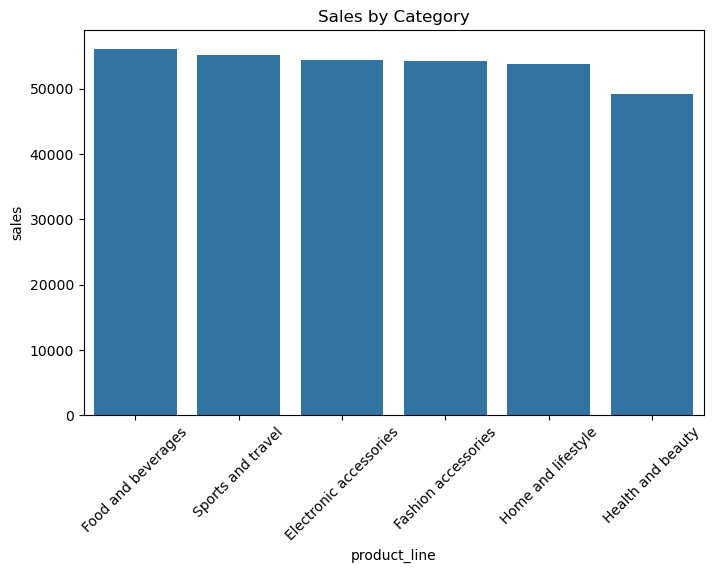

In [78]:
sales_by_category = df.groupby("product_line")["sales"].sum().reset_index()
sales_by_category = sales_by_category.sort_values(by = "sales", ascending=False)
sales_by_category

plt.figure(figsize=(8,5))
sns.barplot(x="product_line", y="sales", data=sales_by_category)
plt.title("Sales by Category")
plt.xticks(rotation=45)
plt.show()


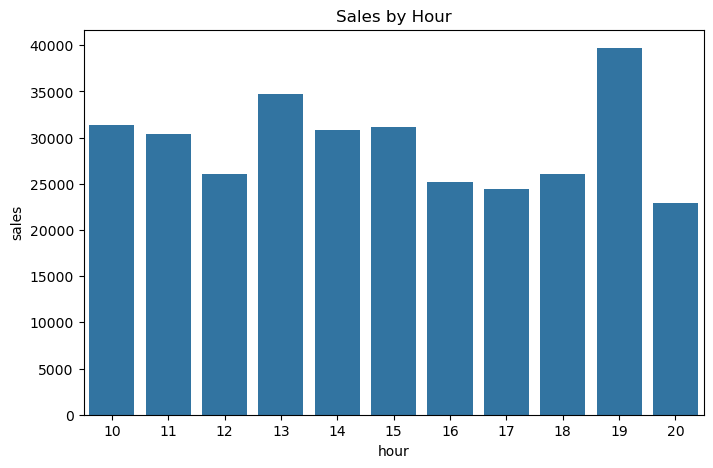

In [79]:
df["hour"] = df["time"].apply(lambda t: t.hour)
sales_by_hour = df.groupby("hour")["sales"].sum().reset_index()
sales_by_hour = sales_by_hour.sort_values(by = "sales", ascending=False)
sales_by_hour

plt.figure(figsize=(8,5))
sns.barplot(x="hour", y="sales", data=sales_by_hour)
plt.title("Sales by Hour")
plt.show()

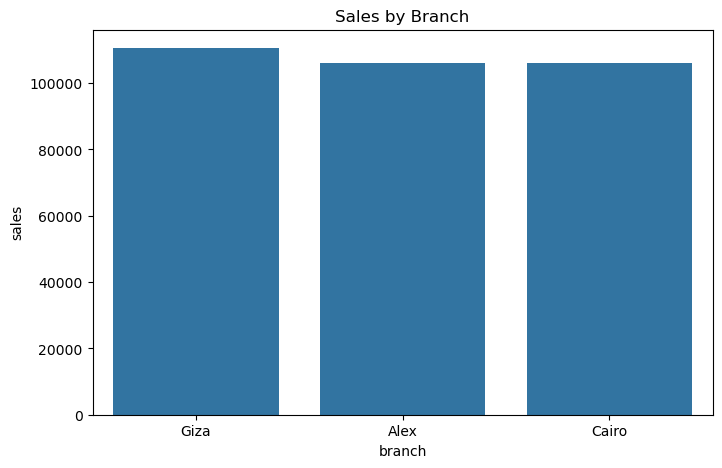

In [80]:
sales_by_branch = df.groupby("branch")["sales"].sum().reset_index()
sales_by_branch = sales_by_branch.sort_values(by = "sales", ascending=False)
sales_by_branch

plt.figure(figsize=(8,5))
sns.barplot(x="branch", y="sales", data=sales_by_branch)
plt.title("Sales by Branch")
plt.show()

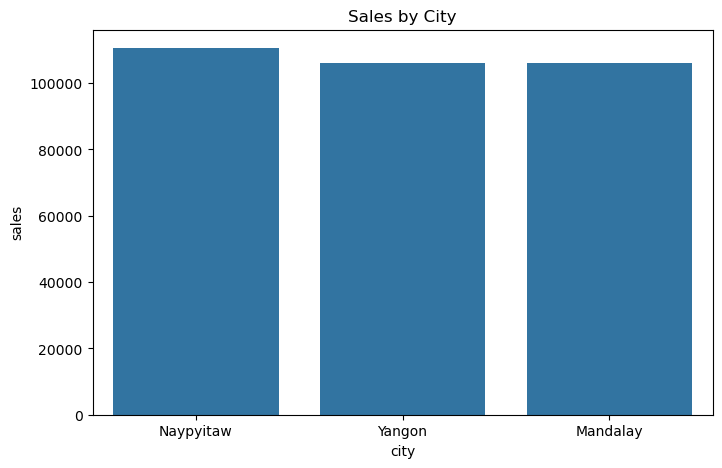

In [81]:
sales_by_city = df.groupby("city")["sales"].sum().reset_index()
sales_by_city = sales_by_city.sort_values(by = "sales", ascending=False)
sales_by_city

plt.figure(figsize=(8,5))
sns.barplot(x="city", y="sales", data=sales_by_city)
plt.title("Sales by City")
plt.show()

In [82]:
best_sells = sales_by_category.head(1)
best_sells

,product_line,sales
2,Food and beverages,56144.844


In [83]:
worst_sells = sales_by_category.sort_values(by="sales", ascending=True).head(1)
worst_sells

,product_line,sales
3,Health and beauty,49193.739


C:\Users\EmilAzimov\AppData\Local\Temp\ipykernel_1732\1429516895.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="month", y="sales", data=sales_by_month, palette="viridis")


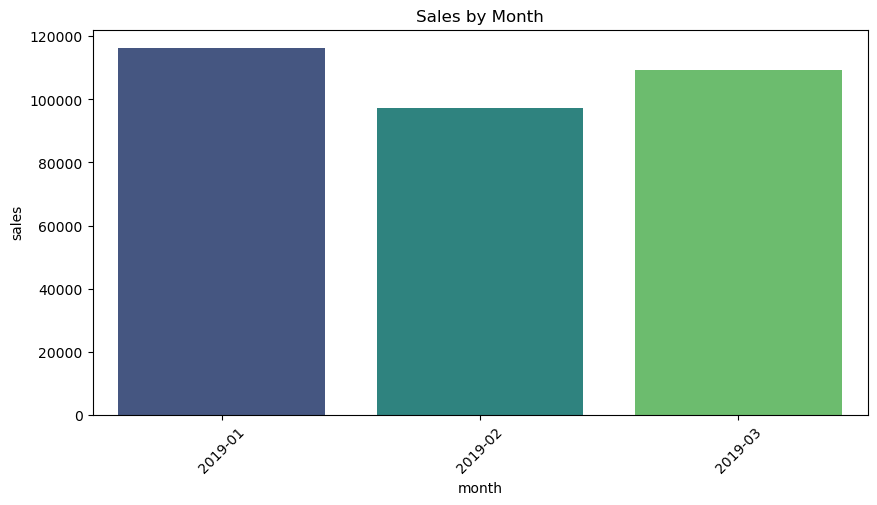

In [89]:
# Create a month column
df["month"] = df["date"].dt.to_period("M")  # '2019-01', '2019-02', etc.

# Total sales per month
sales_by_month = df.groupby("month")["sales"].sum().reset_index()

# Convert month back to string for plotting
sales_by_month["month"] = sales_by_month["month"].astype(str)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x="month", y="sales", data=sales_by_month, palette="viridis")
plt.xticks(rotation=45)
plt.title("Sales by Month")
plt.show()


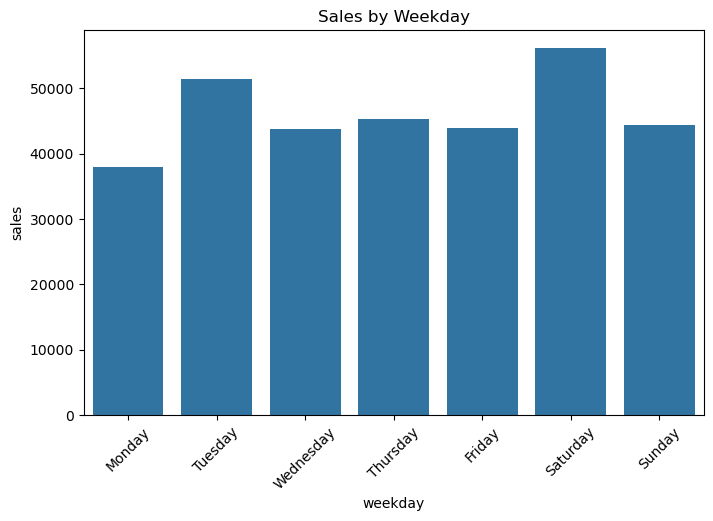

In [88]:
df["weekday"] = df["date"].dt.day_name()
sales_by_weekday = df.groupby("weekday")["sales"].sum().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]).reset_index()
sales_by_weekday

# Sales by weekday
plt.figure(figsize=(8,5))
sns.barplot(x="weekday", y="sales", data=sales_by_weekday)
plt.title("Sales by Weekday")
plt.xticks(rotation=45)
plt.show()


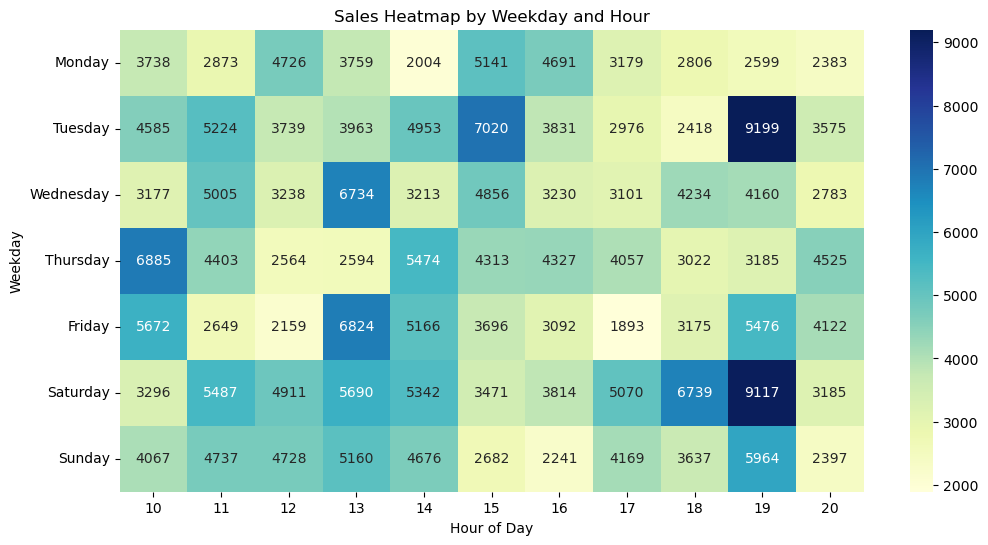

In [96]:
sales_heatmap = df.groupby(["weekday", "hour"])["sales"].sum().unstack()
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_heatmap = sales_heatmap.reindex(ordered_days)
plt.figure(figsize=(12,6))
sns.heatmap(sales_heatmap, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Sales Heatmap by Weekday and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")
plt.show()
